### Advanced Python Training at Arcesium - Day 2 ###
Sep 25-27, 2019
Vikrant Patil

These notes are available online at http://notes.pipal.in/2019/arcesium_advanced_sep/day2.html

© Pipal Academy LLP

[Day 1](http://notes.pipal.in/2019/arcesium_advanced_sep/day1.html) | [Day 2](http://notes.pipal.in/2019/arcesium_advanced_sep/day2.html) | [Day 3](http://notes.pipal.in/2019/arcesium_advanced_sep/day3.html)


We will be using python 3 (>= 3.0) from anaconda for this training. You can download it from


https://www.anaconda.com/download/

### Understanding Iterations ###

In [1]:
for i in [1, 2, 3, 4]:
    print(i)

1
2
3
4


In [2]:
for i in range(3):
    print(i)

0
1
2


In [4]:
for key in {"one":1, "two":2}:
    print(key)

one
two


### The iteration protocol ###

In [5]:
items = [1, 2, 3, 4, 5]

In [6]:
itr_items = iter(items)

In [7]:
itr_items

In [8]:
next(itr_items)

1

In [9]:
next(itr_items)

2

In [10]:
next(itr_items)

3

In [11]:
next(itr_items)

4

In [12]:
next(itr_items)

5

In [13]:
next(itr_items)

StopIteration: 

### generators ###

In [14]:
def squares(numbers):
    for n in numbers:
        yield n*n

In [15]:
squares

<function __main__.squares(numbers)>

In [17]:
sqr = squares(range(5))

In [18]:
sqr

<generator object squares at 0x7f442bd50f68>

In [19]:
for s in sqr:
    print(s)

0
1
4
9
16


In [20]:
for s in sqr:
    print(s)

In [21]:
def squares(numbers):
    print("Begin squares")
    for n in numbers:
        print("Computing square of", n)
        yield n*n
        print("Back to squares")
    print("Finished squares")

In [22]:
sq4 = squares(range(1, 5))

In [23]:
sq4

<generator object squares at 0x7f4448017e60>

In [24]:
next(sq4)

Begin squares
Computing square of 1


1

In [25]:
next(sq4)

Back to squares
Computing square of 2


4

In [26]:
next(sq4)

Back to squares
Computing square of 3


9

In [27]:
next(sq4)

Back to squares
Computing square of 4


16

In [28]:
next(sq4)

Back to squares
Finished squares


StopIteration: 

**problems**

- Write a generator which can count number from n to 1.
```
>>> for i in countdown(4):
        print(i, end=",")
4,3,2,1
```
- Is it possible to know lenghth of sequence generated through generator object?
- Can we write a generator `ones` which can generate infinite sequence of ones?
- How do we work with infinite sequences?
- Write a term generator for y'days piseries. how can we use this generator to sum?


        

In [51]:
def foo(n):
    i = 1
    while True:
        print("Before yield")
        yield i
        print("after yield")
        
        if i ==4:
            return i+1
        i += 1
        

In [34]:
for i in foo(50):
    print(i, "="*5)

Before yield
1 =====
after yield
Before yield
2 =====
after yield
Before yield
3 =====
after yield
Before yield
4 =====
after yield


In [35]:
def ones():
    while True:
        yield 1

In [36]:
def take(seq, n):
    return [next(seq) for i in range(n)]

In [37]:
infinite = ones()

In [38]:
take(infinite, 10)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [52]:
f = foo(4)

In [53]:
x = next(f)

Before yield


In [54]:
x

1

In [55]:
x=next(f)

after yield
Before yield


In [56]:
x

2

In [57]:
x = next(f)

after yield
Before yield


In [58]:
x

3

In [59]:
x = next(f)

after yield
Before yield


In [60]:
x

4

In [61]:
x = next(f)

after yield


StopIteration: 5

In [62]:
x

4

In [64]:
f = foo(3)

In [65]:
next(f)

Before yield


1

In [66]:
next(f)

after yield
Before yield


2

In [67]:
next(f)

after yield
Before yield


3

In [68]:
f()

TypeError: 'generator' object is not callable

In [70]:
try:
    next(f)
except StopIteration as s:


after yield
5


In [73]:
def piseries():
    n = 1
    while True:
        yield 8/((4*n-3)*(4*n-1))
        n += 1
        
def pi(n):
    series = piseries()
    return sum(take(series, n))

In [75]:
pi(10000)

3.1415426535898203

In [76]:
len(piseries())

TypeError: object of type 'generator' has no len()

In [78]:
take(piseries(), 10)

[2.6666666666666665,
 0.22857142857142856,
 0.08080808080808081,
 0.041025641025641026,
 0.02476780185758514,
 0.016563146997929608,
 0.011851851851851851,
 0.008898776418242492,
 0.006926406926406926,
 0.005544005544005544]

### Building data pipeline ###

In [79]:
import os

In [80]:
def find(root):
    for path, direnames, filenames in os.walk(root):
        for f in filenames:
            yield os.path.join(path, f)

In [81]:
def grep(pattern , seq):
    return (x for x in seq if pattern in x)

In [94]:
files = find("/home/vikrant/trainings")
pyfiles = grep(".py", files)
print(take(pyfiles, 5))

['/home/vikrant/trainings/2018/vmware-pune-jan-python/echo.py', '/home/vikrant/trainings/2018/vmware-pune-jan-python/module1.py', '/home/vikrant/trainings/2018/vmware-pune-jan-python/yes.py', '/home/vikrant/trainings/2018/vmware-pune-jan-python/wc.py', '/home/vikrant/trainings/2018/vmware-pune-jan-python/hello2.py']


In [88]:
x = (i*i for i in range(5))

In [89]:
x

<generator object <genexpr> at 0x7f442be0e0f8>

In [90]:
next(x)

0

In [91]:
next(x)

1

In [92]:
for i in x:
    print(i)

4
9
16


In [93]:
def count(seq):
    return sum(1 for i in seq)  
    
def count(seq):
    i = 0
    for x in seq:
        i += 1
    return i

def count(seq):
    return sum((1 for i in seq))

In [97]:
files = find("/home/vikrant/trainings")
pyfiles = grep(".py", files)
print(count(pyfiles))

847


In [129]:
def readlines(filenames):
    for file in filenames:
        with open(file) as f:
            for line in f:
                yield line

In [130]:
f = open("day1.html")

In [131]:
f. close()

In [132]:
files = find(".")
pyfiles = grep(".", files)
lines = readlines(pyfiles)
funcs = grep("def", lines)
count(funcs)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfb in position 0: invalid start byte

In [133]:
def antigrep(pattern,  seq):
    return (x for x in seq if pattern not in x)

In [134]:
files = find("/home/vikrant/trainings/")
pyfiles = grep(".py", files)
pyfiles = antigrep(".pyc", pyfiles)
pyfiles = antigrep("~", pyfiles)
#print(take(pyfiles, 50))
lines = readlines(pyfiles)
funcs = grep("def", lines)
count(funcs)

870

**problem**

Write a function `get_paragraphs` to split given text into paragraphs. The function should take a sequence of lines and should return a sequence of paragraphs. Whenever you encounter empty line, it is end of previous paragraph.

- How many paragraphs are there?
- longest paragraph

https://ia802902.us.archive.org/4/items/prideandprejudic01342gut/pandp12.txt

In [135]:
import requests
def wget(url, filename):
    resp = requests.get(url)
    with open(filename, "w") as f:
        f.write(resp.text)
        

In [137]:
url="https://ia802902.us.archive.org/4/items/prideandprejudic01342gut/pandp12.txt"
wget(url, "pandp.txt")

In [138]:
!tail pandp.txt

In [139]:
def get_paragraphs(lines):
    paragraph = []
    for line in lines:
        if line.strip() !="":
            paragraph.append(line.strip())
        elif paragraph:
            yield "\n".join(paragraph)
            paragraph = []
    if paragraph:
        yield "\n".join(paragraph)

In [147]:
lines = readlines(["pandp.txt"])

paras = get_paragraphs(lines)
count(paras)

2202

In [148]:
lines = readlines(["pandp.txt"])

paras = get_paragraphs(lines)
max(paras, key=len)

'"By this time, my dearest sister, you have received my hurried\nletter; I wish this may be more intelligible, but though not\nconfined for time, my head is so bewildered that I cannot answer\nfor being coherent.  Dearest Lizzy, I hardly know what I would\nwrite, but I have bad news for you, and it cannot be delayed.\nImprudent as the marriage between Mr. Wickham and our poor\nLydia would be, we are now anxious to be assured it has taken\nplace, for there is but too much reason to fear they are not gone\nto Scotland.  Colonel Forster came yesterday, having left\nBrighton the day before, not many hours after the express.\nThough Lydia\'s short letter to Mrs. F. gave them to understand\nthat they were going to Gretna Green, something was dropped\nby Denny expressing his belief that W. never intended to go\nthere, or to marry Lydia at all, which was repeated to Colonel\nF., who, instantly taking the alarm, set off from B. intending to\ntrace their route.  He did trace them easily to Claph

'Please read the "legal small print," and other information about the\neBook and Project Gutenberg at the bottom of this file.  Included is\nimportant information about your specific rights and restrictions in\nhow the file may be used.  You can also find out about how to make a\ndonation to Project Gutenberg, and how to get involved.'

In [149]:
!wc pandp.txt

 14583 123882 717331 pandp.txt


### Numpy ###

In [150]:
import numpy as np

In [151]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [152]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [153]:
a.shape

(8,)

In [154]:
a.ndim

1

In [155]:
a100 = np.arange(100).reshape(10, 10)

In [156]:
a100

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [157]:
a100.shape

(10, 10)

In [158]:
a100.ndim

2

In [159]:
a100[0]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [160]:
a100[0][0]

0

In [161]:
a100[:,0]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [162]:
a100[0,:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [164]:
a100[1,:]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [165]:
np.zeros(100).reshape(5,20)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [166]:
np.zeros_like(a100)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [167]:
np.ones_like(a100)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [168]:
np.asarray([1,2,3,4,5,6,7])

array([1, 2, 3, 4, 5, 6, 7])

In [169]:
np.asarray(np.zeros(20).reshape(5,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [172]:
empty = np.empty(1000).reshape(10,10,10)

In [173]:
empty.ndim

3

In [174]:
empty.shape

(10, 10, 10)

In [175]:
np.empty_like(a100)

array([[     94617717583296,      94617681087424,                 747,
                         -1,      94617681101796,                   0,
        2314885530449486370, 8463501003136704544, 7863396448688172658,
        8511923646844464745],
       [8028899027463793761, 8674250015740290926, 2314885435961013097,
        8241956891972870176,  753071342771072353, 2314885530818453536,
        3255307777713450285, 2314885530817015085, 6926647712756539424,
        8027138984375840097],
       [7308339910637985906, 8242558622326875508, 3347140372856074345,
        2314885530818447882, 7800551649446141984, 2314885530817032051,
        3255307777712594976, 2314885530450210093, 7956010480644923424,
        7021800531646357548],
       [2308669228312243833, 5629534856563138592, 2314885437726225519,
        3255307721659916320, 2314885530817015085, 2338328528344326176,
        8295742012915741545, 6926663087888362849, 3348814942099825774,
        8458358425123711341],
       [7958552634295722100,

In [176]:
a100[:5, :5]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [177]:
a100[5:,5:]

array([[55, 56, 57, 58, 59],
       [65, 66, 67, 68, 69],
       [75, 76, 77, 78, 79],
       [85, 86, 87, 88, 89],
       [95, 96, 97, 98, 99]])

In [178]:
subview = a100[:5,:5]

In [179]:
subview

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [180]:
subview[0,0] = -1

In [181]:
a100

array([[-1,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [182]:
scopy = subview.copy()

In [183]:
scopy[0,0]=0

In [184]:
subview

array([[-1,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [185]:
scopy

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [186]:
d = np.array(range(10))

In [187]:
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [188]:
d > 3

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [189]:
d[d>3]

array([4, 5, 6, 7, 8, 9])

In [190]:
d - 2

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [191]:
d2 = d*2

In [192]:
d2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [193]:
d + d2

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [194]:
d * d2

array([  0,   2,   8,  18,  32,  50,  72,  98, 128, 162])

In [195]:
np.exp(d)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [196]:
a100.max()

99

In [197]:
a100.std()

28.883384496973342

In [198]:
a100.cumsum()

array([  -1,    0,    2,    5,    9,   14,   20,   27,   35,   44,   54,
         65,   77,   90,  104,  119,  135,  152,  170,  189,  209,  230,
        252,  275,  299,  324,  350,  377,  405,  434,  464,  495,  527,
        560,  594,  629,  665,  702,  740,  779,  819,  860,  902,  945,
        989, 1034, 1080, 1127, 1175, 1224, 1274, 1325, 1377, 1430, 1484,
       1539, 1595, 1652, 1710, 1769, 1829, 1890, 1952, 2015, 2079, 2144,
       2210, 2277, 2345, 2414, 2484, 2555, 2627, 2700, 2774, 2849, 2925,
       3002, 3080, 3159, 3239, 3320, 3402, 3485, 3569, 3654, 3740, 3827,
       3915, 4004, 4094, 4185, 4277, 4370, 4464, 4559, 4655, 4752, 4850,
       4949])

In [199]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

In [200]:
from scipy.misc import face

In [201]:
image = face(gray=True)

In [202]:
image

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [203]:
from matplotlib import pyplot as plt

In [204]:
%matplotlib inline

In [205]:
def imshow(img):
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()

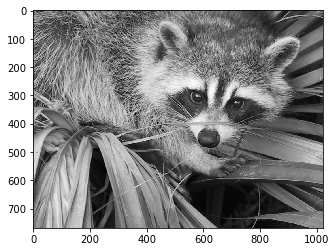

In [206]:
imshow(image)

In [207]:
negate = 255 - image

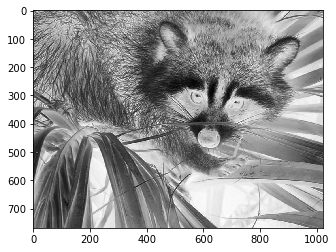

In [208]:
imshow(negate)

In [209]:
thumb = image[::3, ::3]

In [210]:
thumb.shape

(256, 342)

In [211]:
image.shape

(768, 1024)

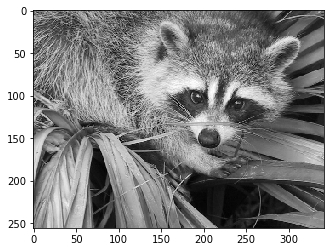

In [212]:
imshow(thumb)

In [213]:
plain = np.zeros_like(thumb)

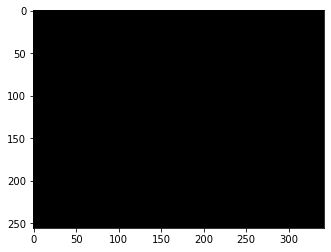

In [214]:
imshow(plain)

In [215]:
plain[::10, :] = 255
plain[:,::10] = 255

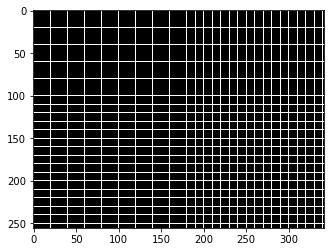

In [216]:
imshow(plain)

In [217]:
plain

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0, 255,   0],
       ...,
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0, 255,   0],
       [255,   0,   0, ...,   0, 255,   0]], dtype=uint8)

In [218]:
plain[:21,:21]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255],
       [255,   0,   0,  

In [219]:
p = np.zeros(100).reshape(10,10)

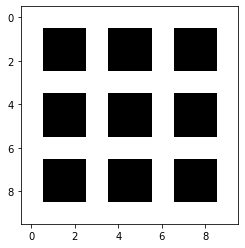

In [220]:
p[::3, :] = 255
p[:,::3] = 255
imshow(p)

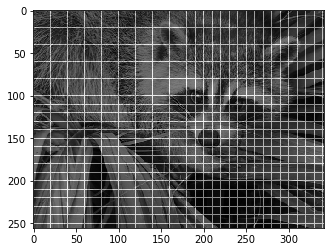

In [221]:
imshow(thumb*0.5 + plain*0.5)

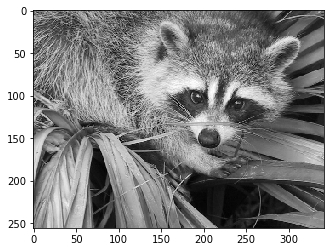

In [222]:
imshow(thumb)

In [227]:
def swapcorners(img):
    imglike = img.copy()
    h, w = img.shape
    q1 = img[:h//2, :w//2].copy()
    q4 = img[h//2:, w//2:].copy()
    
    imglike[:h//2, :w//2] = q4
    imglike[h//2:, w//2:] = q1
    return imglike

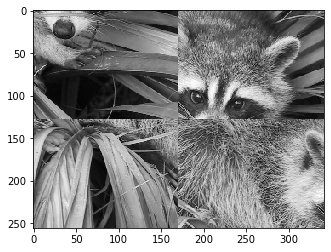

In [228]:
imshow(swapcorners(thumb))

In [229]:
5/3

1.6666666666666667

In [230]:
5//3

1

In [231]:
thumb = image[::10, ::10]

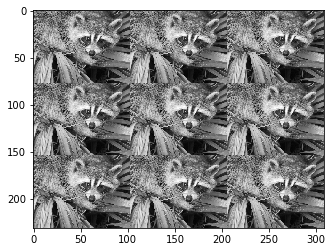

In [232]:
hthumb = np.hstack([thumb, thumb, thumb])
vthumb = np.vstack([hthumb, hthumb, hthumb])
imshow(vthumb)

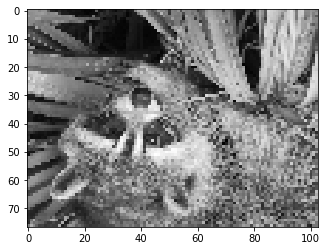

In [233]:
imshow(np.flip(thumb))

In [234]:
np.roll?

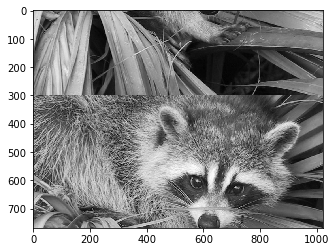

In [236]:
imshow(np.roll(image, 300, 0))

### Matplotlib ###
Download data from http://notes.pipal.in/2019/arcesium_advanced_sep/HYDERABAD-weather.csv

In [239]:
url = "http://notes.pipal.in/2019/arcesium_advanced_sep/HYDERABAD-weather.csv"
wget(url, "HYDERABAD-weather.csv")

In [240]:
!tail HYDERABAD-weather.csv

589,HYDERABAD,December,1991,28.1,14.9,0.3
590,HYDERABAD,December,1992,27.1,13.8,0.0
591,HYDERABAD,December,1993,27.1,13.2,34.9
592,HYDERABAD,December,1994,27.9,12.0,0.0
593,HYDERABAD,December,1995,28.9,15.9,0.0
594,HYDERABAD,December,1996,28.3,14.9,0.0
595,HYDERABAD,December,1997,28.7,19.2,40.6
596,HYDERABAD,December,1998,28.7,12.8,0.0
597,HYDERABAD,December,1999,29.0,14.2,0.0
598,HYDERABAD,December,2000,29.6,13.3,1.0


In [241]:
import csv

In [245]:
with open("HYDERABAD-weather.csv") as f:
    data = list(csv.reader(f))
    

In [246]:
type(data)

list

In [247]:
data[0]

['', 'city', 'month', 'year', 'maxtemp', 'mintemp', 'rainfall']

In [248]:
d = data[1:]

In [250]:
d[:3]

[['0', 'HYDERABAD', 'January', '1951', '29.0', '14.8', '0.0'],
 ['1', 'HYDERABAD', 'January', '1952', '29.1', '13.6', '0.0'],
 ['2', 'HYDERABAD', 'January', '1953', '28.6', '14.6', '3.5']]

In [251]:
def floatcolumn(data, n):
    return [float(row[n]) for row in data]

In [252]:
maxtemp = floatcolumn(d, 4)

In [253]:
mintemp = floatcolumn(d, 5)

In [254]:
rainfall = floatcolumn(d, 6)

ValueError: could not convert string to float: 

In [255]:
def float_(sf):
    try:
        return float(sf)
    except Exception as e:
        print(e)
        return 0
def floatcolumn(data, n):
    return [float_(row[n]) for row in data]

In [256]:
rainfall = floatcolumn(d, 6)

could not convert string to float: 


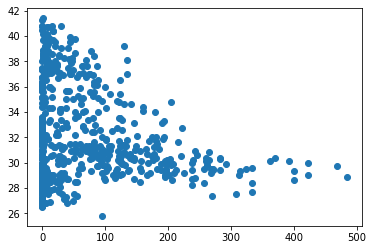

In [257]:
plt.scatter(rainfall, maxtemp)

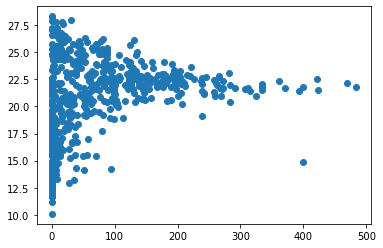

In [258]:
plt.scatter(rainfall, mintemp)

In [259]:
data[0]

['', 'city', 'month', 'year', 'maxtemp', 'mintemp', 'rainfall']

In [260]:
d[:2]

[['0', 'HYDERABAD', 'January', '1951', '29.0', '14.8', '0.0'],
 ['1', 'HYDERABAD', 'January', '1952', '29.1', '13.6', '0.0']]

In [261]:
year = [int(row[3]) for row in d ]

In [262]:
d[:6]

[['0', 'HYDERABAD', 'January', '1951', '29.0', '14.8', '0.0'],
 ['1', 'HYDERABAD', 'January', '1952', '29.1', '13.6', '0.0'],
 ['2', 'HYDERABAD', 'January', '1953', '28.6', '14.6', '3.5'],
 ['3', 'HYDERABAD', 'January', '1954', '28.2', '13.9', '0.0'],
 ['4', 'HYDERABAD', 'January', '1955', '28.0', '14.7', '0.0'],
 ['5', 'HYDERABAD', 'January', '1956', '28.1', '14.2', '0.0']]

In [264]:
d[-6:]

[['593', 'HYDERABAD', 'December', '1995', '28.9', '15.9', '0.0'],
 ['594', 'HYDERABAD', 'December', '1996', '28.3', '14.9', '0.0'],
 ['595', 'HYDERABAD', 'December', '1997', '28.7', '19.2', '40.6'],
 ['596', 'HYDERABAD', 'December', '1998', '28.7', '12.8', '0.0'],
 ['597', 'HYDERABAD', 'December', '1999', '29.0', '14.2', '0.0'],
 ['598', 'HYDERABAD', 'December', '2000', '29.6', '13.3', '1.0']]

In [266]:
len(set(year))

50

In [267]:
ra = np.array(rainfall)

In [268]:
sorteddata = sorted(d, key=lambda r:r[3])

In [269]:
rainfall = floatcolumn(sorteddata, 6)

could not convert string to float: 


In [270]:
year = [int(row[3]) for row in sorteddata]

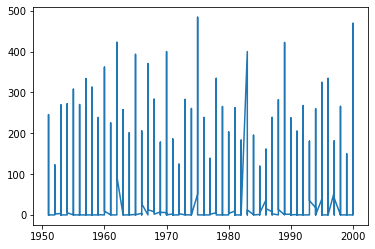

In [271]:
plt.plot(year, rainfall)

<BarContainer object of 12 artists>

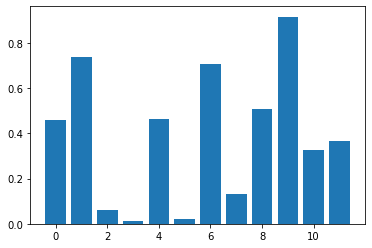

In [272]:
import random 
plt.bar(range(12), [random.random() for i in range(12)])

In [273]:
months = np.array([row[2] for row in d])

In [274]:
rainfall = np.array(floatcolumn(d, 6))

could not convert string to float: 


In [275]:
rainfall[months=="January"].mean()

13.177999999999997

In [276]:
import datetime

In [277]:
def get_mean_rainfall(rainfall, months, month):
    return rainfall[months==month].mean()

In [279]:
d = datetime.datetime(2019, 9, 26)

In [280]:
d.strftime("%B")

'September'

In [281]:
help(d.strftime)

Help on built-in function strftime:

strftime(...) method of datetime.datetime instance
    format -> strftime() style string.



In [282]:
mnames = [datetime.datetime(2010, i+1, 1).strftime("%B") for i in range(12)]

In [283]:
mnames

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [284]:
rainfall_ = [get_mean_rainfall(rainfall, months, m) for m in mnames]

In [285]:
rainfall_

[13.177999999999997,
 7.94,
 15.264000000000001,
 20.23469387755102,
 35.714,
 103.75399999999999,
 169.86,
 178.69,
 158.292,
 97.15800000000002,
 21.971999999999998,
 5.912000000000001]

<BarContainer object of 12 artists>

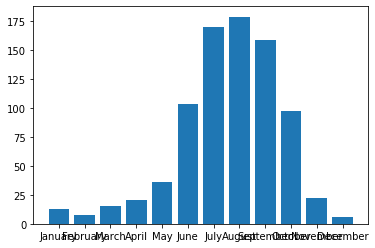

In [286]:
plt.bar(mnames, rainfall_)

<BarContainer object of 12 artists>

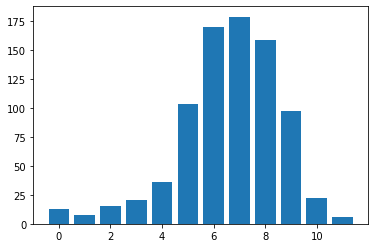

In [287]:
plt.bar(range(12), rainfall_)

In [288]:
import altair as alt

In [289]:
%%file sample.txt
area,sales,profit
North,5,2
East,25,8
West,15,6
South,20,5
Central,10,3

Writing sample.txt


In [290]:
import pandas as pd

In [291]:
sample = pd.read_csv("sample.txt")

In [292]:
alt.Chart(sample).mark_point()

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [293]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [294]:
alt.Chart(sample).mark_point()

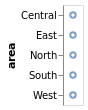

In [295]:
alt.Chart(sample).mark_point().encode(y="area")

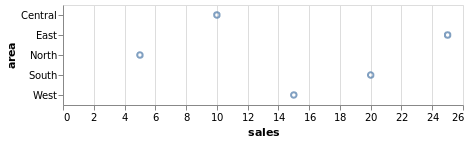

In [297]:
alt.Chart(sample).mark_point().encode(
    y = "area",
    x = "sales"
)

In [298]:
base = alt.Chart(sample).mark_point().encode(
    y = "area",
    x = "sales"
)

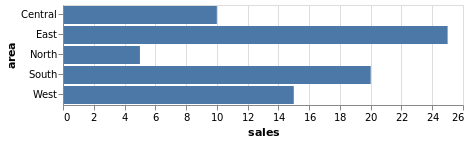

In [299]:
base.mark_bar()

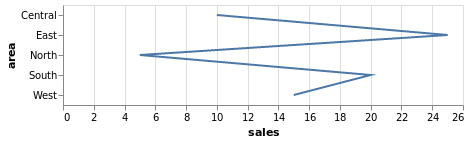

In [300]:
base.mark_line()

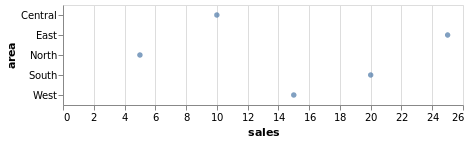

In [301]:
base.mark_circle()

In [303]:
base = alt.Chart(sample).mark_bar().encode(
    y = "area",
    x = "sales",
    color = "area"
)

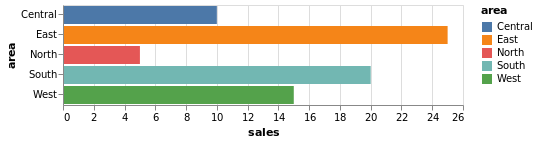

In [304]:
base

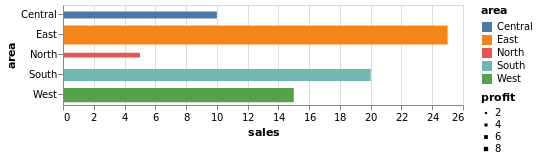

In [305]:
base.encode(size="profit")

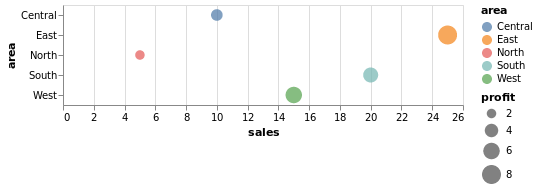

In [306]:
base.encode(size="profit").mark_circle()

In [307]:
print(base.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.4.0.json",
  "config": {
    "mark": {
      "tooltip": null
    },
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49"
  },
  "datasets": {
    "data-e9a1bf97bac3c6f8642dc2ef7d8e4b49": [
      {
        "area": "North",
        "profit": 2,
        "sales": 5
      },
      {
        "area": "East",
        "profit": 8,
        "sales": 25
      },
      {
        "area": "West",
        "profit": 6,
        "sales": 15
      },
      {
        "area": "South",
        "profit": 5,
        "sales": 20
      },
      {
        "area": "Central",
        "profit": 3,
        "sales": 10
      }
    ]
  },
  "encoding": {
    "color": {
      "field": "area",
      "type": "nominal"
    },
    "x": {
      "field": "sales",
      "type": "quantitative"
    },
    "y": {
      "field": "area",
      "type": "nominal"
    }
  },
  "mark": "bar"
}


In [308]:
s = base.encode(size="profit").mark_circle()

In [309]:
s.save("sample.html")

In [310]:
!less sample.html

<!DOCTYPE html>
<html>
<head>
  <style>
    .vega-actions a {
        margin-right: 12px;
        color: #757575;
        font-weight: normal;
        font-size: 13px;
    }
    .error {
        color: red;
    }
  </style>
  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega@5"></script>
  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega-lite@3.4.0"></script>
  <script type="text/javascript" src="https://cdn.jsdelivr.net/npm//vega-embed@4"></script>
</head>
<body>
  <div id="vis"></div>
:ple.html

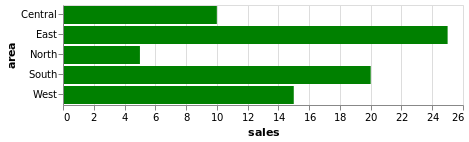

In [312]:
sales = alt.Chart(sample).mark_bar().encode(
    alt.Y("area"),
    alt.X("sales"),
    alt.Color(value="green")
)
sales

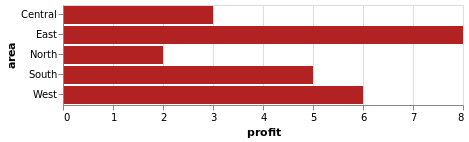

In [313]:
profit = alt.Chart(sample).mark_bar().encode(
    alt.Y("area"),
    alt.X("profit"),
    alt.Color(value="firebrick")
)
profit

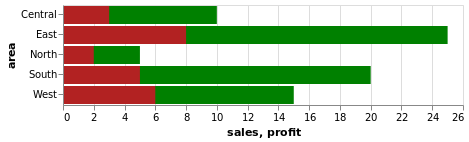

In [314]:
sales  + profit

### pandas ###

In [315]:
sample

,area,sales,profit
0,North,5,2
1,East,25,8
2,West,15,6
3,South,20,5
4,Central,10,3


#### Series ###

In [317]:
area = pd.Series(['North','East','West','South','Central'])

In [318]:
area

0      North
1       East
2       West
3      South
4    Central
dtype: object

In [319]:
sales = pd.Series([5,25,15,20,10], index=area)

In [320]:
sales

North       5
East       25
West       15
South      20
Central    10
dtype: int64

In [321]:
sales['North']

5

In [322]:
sales[0]

5

In [327]:
sales.reindex(index=sorted(area))

Central    10
East       25
North       5
South      20
West       15
dtype: int64

In [324]:
sales

North       5
East       25
West       15
South      20
Central    10
dtype: int64

In [325]:
sales[sales > 10]

East     25
West     15
South    20
dtype: int64

In [326]:
sales

North       5
East       25
West       15
South      20
Central    10
dtype: int64

In [328]:
sales[-1]

10

In [329]:
profit = pd.Series([2, 8, 6, 5, 3])

In [330]:
profit[-1]

KeyError: -1

In [331]:
profit.mean()

4.8

In [332]:
profit.std()

2.3874672772626644

In [333]:
df = pd.DataFrame({"sales":[20,23,12,6,25],
                   "profit":[5,2,7,1,8]
                  }, index=['North','East','West','South','Central']
                 )

In [334]:
df

,sales,profit
North,20,5
East,23,2
West,12,7
South,6,1
Central,25,8


In [335]:
df['sales']

North      20
East       23
West       12
South       6
Central    25
Name: sales, dtype: int64

In [336]:
df.sales

North      20
East       23
West       12
South       6
Central    25
Name: sales, dtype: int64

In [337]:
df.head()

,sales,profit
North,20,5
East,23,2
West,12,7
South,6,1
Central,25,8


In [340]:
weather = pd.read_csv("HYDERABAD-weather.csv")

In [341]:
weather.head()

,Unnamed: 0,city,month,year,maxtemp,mintemp,rainfall
0,0,HYDERABAD,January,1951,29.0,14.8,0.0
1,1,HYDERABAD,January,1952,29.1,13.6,0.0
2,2,HYDERABAD,January,1953,28.6,14.6,3.5
3,3,HYDERABAD,January,1954,28.2,13.9,0.0
4,4,HYDERABAD,January,1955,28.0,14.7,0.0


In [342]:
df.loc['North']

sales     20
profit     5
Name: North, dtype: int64

In [343]:
df.iloc[3]

sales     6
profit    1
Name: South, dtype: int64

In [344]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
Unnamed: 0    599 non-null int64
city          599 non-null object
month         599 non-null object
year          599 non-null int64
maxtemp       599 non-null float64
mintemp       599 non-null float64
rainfall      598 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 32.9+ KB


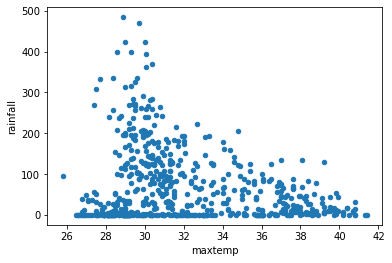

In [346]:
weather.plot("maxtemp", "rainfall", kind="scatter")

In [347]:
weather.groupby('year').mean()

,Unnamed: 0,maxtemp,mintemp,rainfall
year,,,,
1951,274.333333,32.666667,20.233333,58.975000
1952,275.333333,31.975000,19.891667,46.741667
1953,276.333333,32.183333,20.266667,74.245455
1954,277.333333,31.525000,19.875000,70.366667
1955,278.333333,30.883333,19.725000,92.775000
1956,279.333333,30.783333,19.791667,64.941667
1957,280.333333,31.533333,20.016667,66.783333
1958,281.333333,31.733333,20.475000,76.216667
1959,282.333333,31.900000,20.358333,64.825000


In [348]:
weather.groupby("month").mean()

,Unnamed: 0,year,maxtemp,mintemp,rainfall
month,,,,,
April,174.0,1975.77551,37.863265,24.273469,20.234694
August,373.5,1975.50000,29.786000,22.086000,178.690000
December,573.5,1975.50000,28.004000,14.526000,5.912000
February,74.5,1975.50000,31.932000,17.556000,7.940000
January,24.5,1975.50000,28.760000,15.214000,13.178000
July,323.5,1975.50000,30.754000,22.560000,169.860000
June,273.5,1975.50000,34.528000,23.976000,103.754000
March,124.5,1975.50000,35.444000,20.798000,15.264000
May,223.5,1975.50000,38.996000,26.160000,35.714000


In [349]:
weather

,Unnamed: 0,city,month,year,maxtemp,mintemp,rainfall
0,0,HYDERABAD,January,1951,29.0,14.8,0.0
1,1,HYDERABAD,January,1952,29.1,13.6,0.0
2,2,HYDERABAD,January,1953,28.6,14.6,3.5
3,3,HYDERABAD,January,1954,28.2,13.9,0.0
4,4,HYDERABAD,January,1955,28.0,14.7,0.0
...,...,...,...,...,...,...,...
594,594,HYDERABAD,December,1996,28.3,14.9,0.0
595,595,HYDERABAD,December,1997,28.7,19.2,40.6
596,596,HYDERABAD,December,1998,28.7,12.8,0.0
597,597,HYDERABAD,December,1999,29.0,14.2,0.0


In [350]:
groupbymonth = weather.groupby('month').mean()

In [351]:
groupbymonth

,Unnamed: 0,year,maxtemp,mintemp,rainfall
month,,,,,
April,174.0,1975.77551,37.863265,24.273469,20.234694
August,373.5,1975.50000,29.786000,22.086000,178.690000
December,573.5,1975.50000,28.004000,14.526000,5.912000
February,74.5,1975.50000,31.932000,17.556000,7.940000
January,24.5,1975.50000,28.760000,15.214000,13.178000
July,323.5,1975.50000,30.754000,22.560000,169.860000
June,273.5,1975.50000,34.528000,23.976000,103.754000
March,124.5,1975.50000,35.444000,20.798000,15.264000
May,223.5,1975.50000,38.996000,26.160000,35.714000


In [352]:
del groupbymonth['Unnamed: 0']
del groupbymonth['year']

In [353]:
groupbymonth

,maxtemp,mintemp,rainfall
month,,,
April,37.863265,24.273469,20.234694
August,29.786000,22.086000,178.690000
December,28.004000,14.526000,5.912000
February,31.932000,17.556000,7.940000
January,28.760000,15.214000,13.178000
July,30.754000,22.560000,169.860000
June,34.528000,23.976000,103.754000
March,35.444000,20.798000,15.264000
May,38.996000,26.160000,35.714000


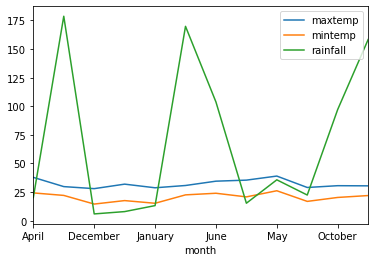

In [354]:
groupbymonth.plot()

In [355]:
groupbymonth

,maxtemp,mintemp,rainfall
month,,,
April,37.863265,24.273469,20.234694
August,29.786000,22.086000,178.690000
December,28.004000,14.526000,5.912000
February,31.932000,17.556000,7.940000
January,28.760000,15.214000,13.178000
July,30.754000,22.560000,169.860000
June,34.528000,23.976000,103.754000
March,35.444000,20.798000,15.264000
May,38.996000,26.160000,35.714000


In [356]:
groupbymonth.index

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='month')

array(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February', 'February', 'February', 'February', 'February',
       'February

In [358]:
mnames

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

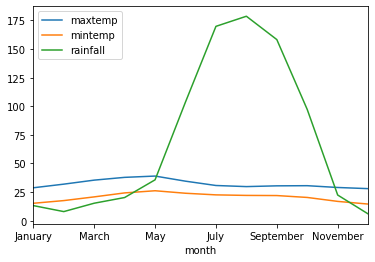

In [360]:
groupbymonth.reindex(index=mnames).plot()

In [366]:
decdata = groupbymonth.loc['December']

In [367]:
decdata

maxtemp     28.004
mintemp     14.526
rainfall     5.912
Name: December, dtype: float64

In [369]:
decdata['maxtemp']

28.003999999999998

In [370]:
dict(decdata)

{'maxtemp': 28.003999999999998,
 'mintemp': 14.525999999999996,
 'rainfall': 5.912000000000001}

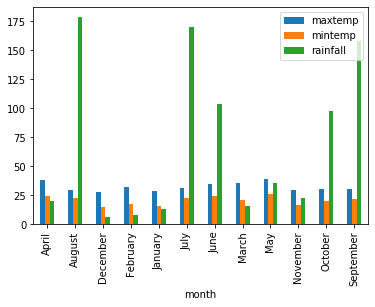

In [379]:
groupbymonth.plot(kind='bar')

### XML ###

In [380]:
url = "http://www.thehindu.com/"

In [381]:
response = requests.get(url, params={"service":"rss"})

In [382]:
xmltext = response.text

In [390]:
print(xmltext[:1200])

<?xml version="1.0" encoding="UTF-8"?>
<rss version="2.0">
    <channel>
        <title>The Hindu - Home</title>
        <link>https://www.thehindu.com/</link>
        <description>Default RSS Feed</description>
        <language>en-us</language>
        <copyright>Copyright 2019 The Hindu</copyright>
        <item>
            <title><![CDATA[PMC has enough liquidity, depositors’ money fully safe, claims suspended MD ]]></title>
            <author><![CDATA[PTI]]></author>
            <category><![CDATA[National]]></category>
            <link>https://www.thehindu.com/news/national/pmc-has-enough-liquidity-depositors-money-fully-safe-claims-suspended-md/article29519311.ece</link>
            <description><![CDATA[
                He states that the present crisis was solely due to large account - HDIL. 
            ]]></description>
            <pubDate><![CDATA[Thu, 26 Sep 2019 16:54:58 +0530]]></pubDate>
        </item>
        <item>
            <title><![CDATA[Students should star

In [384]:
from xml.etree import ElementTree as et

In [385]:
root = et.fromstring(xmltext)

In [391]:
items = root.findall(".//item")

In [392]:
len(items)

100

In [393]:
type(items)

list

In [394]:
items[0]

<Element 'item' at 0x7f44034e4098>

In [395]:
print(et.tostring(items[0]).decode())

<item>
            <title>PMC has enough liquidity, depositors&#8217; money fully safe, claims suspended MD </title>
            <author>PTI</author>
            <category>National</category>
            <link>https://www.thehindu.com/news/national/pmc-has-enough-liquidity-depositors-money-fully-safe-claims-suspended-md/article29519311.ece</link>
            <description>
                He states that the present crisis was solely due to large account - HDIL. 
            </description>
            <pubDate>Thu, 26 Sep 2019 16:54:58 +0530</pubDate>
        </item>
        


In [396]:
for item in items[:10]:
    print(item.findtext("title"))
    print(item.findtext("link"))
    print("-"*30)

PMC has enough liquidity, depositors’ money fully safe, claims suspended MD 
https://www.thehindu.com/news/national/pmc-has-enough-liquidity-depositors-money-fully-safe-claims-suspended-md/article29519311.ece
------------------------------
Students should start social media campaign demanding declaration of climate emergency: Anbumani Ramadoss
https://www.thehindu.com/news/cities/chennai/students-should-start-social-media-campaign-demanding-declaration-of-climate-emergency-anbumani-ramadoss/article29519727.ece
------------------------------
Sivakarthikeyan convinced me to do ‘Namma Veettu Pillai’: Pandiraj
https://www.thehindu.com/entertainment/movies/return-of-the-sibilings/article29519721.ece
------------------------------
Invis Multimedia has been providing digital content for Kerala Tourism for 20 years
https://www.thehindu.com/life-and-style/travel/mr-hari-managing-director-of-invis-multimedia-the-leader-in-creating-digital-content-for-kerala-tourism-for-nearly-20-years-explains-w

In [398]:
from xml.dom.minidom import parseString

In [399]:
root = parseString(xmltext)

In [400]:
root

In [402]:
items = root.getElementsByTagName("item")

In [403]:
type(items)

xml.dom.minicompat.NodeList

In [404]:
for item in items[:10]:
    title = item.getElementsByTagName("title")[0]
    link = item.getElementsByTagName("link")[0]
    print(title.firstChild.data)
    print(link.firstChild.data)
    print("-"*30)

PMC has enough liquidity, depositors’ money fully safe, claims suspended MD 
https://www.thehindu.com/news/national/pmc-has-enough-liquidity-depositors-money-fully-safe-claims-suspended-md/article29519311.ece
------------------------------
Students should start social media campaign demanding declaration of climate emergency: Anbumani Ramadoss
https://www.thehindu.com/news/cities/chennai/students-should-start-social-media-campaign-demanding-declaration-of-climate-emergency-anbumani-ramadoss/article29519727.ece
------------------------------
Sivakarthikeyan convinced me to do ‘Namma Veettu Pillai’: Pandiraj
https://www.thehindu.com/entertainment/movies/return-of-the-sibilings/article29519721.ece
------------------------------
Invis Multimedia has been providing digital content for Kerala Tourism for 20 years
https://www.thehindu.com/life-and-style/travel/mr-hari-managing-director-of-invis-multimedia-the-leader-in-creating-digital-content-for-kerala-tourism-for-nearly-20-years-explains-w

### json ###

In [405]:
import json

In [406]:
decdata = dict(decdata)

In [407]:
decdata

{'maxtemp': 28.003999999999998,
 'mintemp': 14.525999999999996,
 'rainfall': 5.912000000000001}

In [409]:
s = json.dumps(decdata)

In [410]:
s

'{"maxtemp": 28.003999999999998, "mintemp": 14.525999999999996, "rainfall": 5.912000000000001}'

In [411]:
json.loads(s)

{'maxtemp': 28.003999999999998,
 'mintemp': 14.525999999999996,
 'rainfall': 5.912000000000001}

In [412]:
url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo"

In [413]:
print(url)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo


In [414]:
resp = requests.get(url)
data = resp.json()

In [431]:
pd.DataFrame(data['Time Series (5min)']).transpose()

,1. open,2. high,3. low,4. close,5. volume
2019-09-25 16:00:00,139.6800,139.6900,139.2800,139.3600,1085867
2019-09-25 15:55:00,139.8400,139.8800,139.6900,139.6900,480398
2019-09-25 15:50:00,139.6450,139.8400,139.5500,139.8400,392727
2019-09-25 15:45:00,139.5750,139.6900,139.5400,139.6450,241860
2019-09-25 15:40:00,139.5500,139.6000,139.4950,139.5800,182013
...,...,...,...,...,...
2019-09-05 09:55:00,139.1101,139.3900,139.0860,139.3600,395149
2019-09-05 09:50:00,138.9900,139.2300,138.9100,139.1200,601935
2019-09-05 09:45:00,139.0150,139.2200,138.8700,138.9900,673859
2019-09-05 09:40:00,138.9700,139.1100,138.9100,139.0100,510635


In [416]:
url = "https://api.github.com/orgs/{}/repos".format("google")

In [417]:
url

'https://api.github.com/orgs/google/repos'

In [418]:
repos = requests.get(url).json()

In [419]:
type(repos)

list

In [420]:
repos[0]

{'id': 1936771,
 'node_id': 'MDEwOlJlcG9zaXRvcnkxOTM2Nzcx',
 'name': 'truth',
 'full_name': 'google/truth',
 'private': False,
 'owner': {'login': 'google',
  'id': 1342004,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjEzNDIwMDQ=',
  'avatar_url': 'https://avatars1.githubusercontent.com/u/1342004?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/google',
  'html_url': 'https://github.com/google',
  'followers_url': 'https://api.github.com/users/google/followers',
  'following_url': 'https://api.github.com/users/google/following{/other_user}',
  'gists_url': 'https://api.github.com/users/google/gists{/gist_id}',
  'starred_url': 'https://api.github.com/users/google/starred{/owner}{/repo}',
  'subscriptions_url': 'https://api.github.com/users/google/subscriptions',
  'organizations_url': 'https://api.github.com/users/google/orgs',
  'repos_url': 'https://api.github.com/users/google/repos',
  'events_url': 'https://api.github.com/users/google/events{/privacy}',
  'received_events_u

In [421]:
r = repos[0]

In [422]:
r['forks']

198

In [423]:
r['owner']['id']

1342004

In [425]:
for r in sorted(repos, key=lambda r:r['owner']['id'], reverse=True)[:20]:
    print(r['owner']['id'], r['forks'])

1342004 198
1342004 17
1342004 34
1342004 0
1342004 17
1342004 80
1342004 9
1342004 10
1342004 11
1342004 12
1342004 21
1342004 48
1342004 15
1342004 12
1342004 58
1342004 218
1342004 102
1342004 22
1342004 0
1342004 8


In [426]:
for r in sorted(repos, key=lambda r:r['forks'], reverse=True)[:10]:
    print(r['full_name'], r['forks'])

google/dagger 1710
google/traceur-compiler 603
google/ios-webkit-debug-proxy 379
google/tracing-framework 218
google/truth 198
google/namebench 102
google/googletv-android-samples 80
google/libcxx 58
google/cpp-netlib 58
google/module-server 48


In [427]:
pd.read_json("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo")

,Meta Data,Time Series (5min)
1. Information,"Intraday (5min) open, high, low, close prices ...",NaN
2. Symbol,MSFT,NaN
3. Last Refreshed,2019-09-25 16:00:00,NaN
4. Interval,5min,NaN
5. Output Size,Full size,NaN
...,...,...
2019-09-05 09:55:00,NaN,"{'1. open': '139.1101', '2. high': '139.3900',..."
2019-09-05 09:50:00,NaN,"{'1. open': '138.9900', '2. high': '139.2300',..."
2019-09-05 09:45:00,NaN,"{'1. open': '139.0150', '2. high': '139.2200',..."
2019-09-05 09:40:00,NaN,"{'1. open': '138.9700', '2. high': '139.1100',..."


### Flask ###

In [444]:
%%file flask_app.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route("/hello/<name>")
def hellourl(name="Flask"):
    return render_template("hello.html", name=name)

@app.route("/")
def index():
    return "This is index page of flask app"

if __name__ == "__main__":
    app.run()

Overwriting flask_app.py


In [445]:
!python flask_app.py

 * Serving Flask app "flask_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Sep/2019 18:56:34] "GET /hello/Python HTTP/1.1" 200 -
^C


In [441]:
!mkdir templates

In [442]:
%%file templates/hello.html
<!doctype html>
<title>Hello from Flask</title>
{% if name %}
   <h1>Hello {{ name }} </h1>
{% else %}
   <h1>Hello, World!</h1>
{% endif %}

Writing templates/hello.html
